Code I built up on is from [Jeff Heaton](https://sites.wustl.edu/jeffheaton/) [Linktext](https://) a university professor from Washington University St. Louis

In [1]:
#try:
    #%tensorflow_version 2.x
    #COLAB = True
    #print("Note: using Google CoLab")
#except:
    #print("Note: not using Google CoLab")
    #COLAB = False

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
# HIDE OUTPUT
!git clone https://github.com/NVlabs/stylegan3.git


fatal: destination path 'stylegan3' already exists and is not an empty directory.


In [5]:
import sys
import pickle
import os
import numpy as np
import PIL.Image
from IPython.display import Image
import matplotlib.pyplot as plt
import IPython.display
import torch
import dnnlib
import legacy
import time

ModuleNotFoundError: No module named 'torch'

In [ ]:


def seed2vec(G, seed):
  return np.random.RandomState(seed).randn(1, G.z_dim)

def display_image(image):
  plt.axis('off')
  plt.imshow(image)
  plt.show()

def generate_image(G, z, truncation_psi):
    # render imgs
    Gs_kwargs = {
        'output_transform': dict(func=tflib.convert_images_to_uint8,
        nchw_to_nhwc=True),
        'randomize_noise': False
    }
    if truncation_psi is not None:
        Gs_kwargs['truncation_psi'] = truncation_psi

    label = np.zeros([1] + G.input_shapes[1][1:])

    images = G.run(z, label, **G_kwargs)
    return images[0]

def get_label(G, device, class_idx):
  label = torch.zeros([1, G.c_dim], device=device)
  if G.c_dim != 0:
      if class_idx is None:
          ctx.fail('Must specify class label with --class'\
                   'when using a conditional network')
      label[:, class_idx] = 1
  else:
      if class_idx is not None:
          print ('warn: --class=lbl ignored when running '\
            'on an unconditional network')
  return label

def generate_image(device, G, z, truncation_psi=1.0,
                   noise_mode='const', class_idx=None):
  z = torch.from_numpy(z).to(device)
  label = get_label(G, device, class_idx)
  img = G(z, label, truncation_psi=truncation_psi,
          noise_mode=noise_mode)
  img = (img.permute(0, 2, 3, 1) * 127.5 + 128)\
    .clamp(0, 255).to(torch.uint8)
  return PIL.Image.fromarray(img[0].cpu().numpy(), 'RGB')

Next, we load the NVIDIA FFHQ (faces) GAN.  We could use any StyleGAN pretrained GAN network here.

In [ ]:
MODEL_PATH = "./model/network-snapshot-005000.pkl"

In [ ]:

print(f'Loading networks from" {MODEL_PATH}"...' )
device = torch.device('cuda')

with open(MODEL_PATH, 'rb') as f:
    G = legacy.load_network_pkl(f)['G_ema']\
      .requires_grad_(False).to(device)

Loading networks from" /content/drive/My Drive/MA/model/network-snapshot-005000.pkl"...


No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
import random
random_seed = random.randint(0,10000)
START_SEED_RANDOM = random.randint(0,random_seed)
START_SEED_MANUAL = 3479

print(START_SEED_RANDOM)

current = seed2vec(G, START_SEED_RANDOM)

8445


Setting up PyTorch plugin "bias_act_plugin"... 

/usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(


Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... 

/usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(


Done.


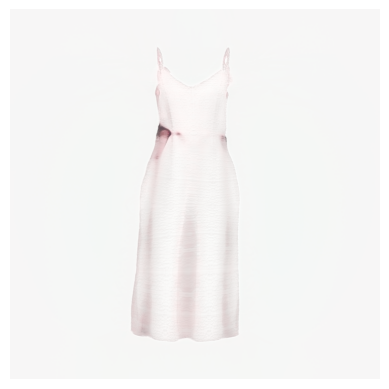

In [ ]:
img = generate_image(device, G, current)
SCALE = 0.5
display_image(img)

In [ ]:
!pip install pyngrok

In [ ]:
from flask import Flask, jsonify
from flask_cors import CORS
from pyngrok import ngrok
from getpass import getpass
import threading

# Securely get ngrok token
ngrok_token = getpass("Enter your ngrok auth token: ")
ngrok.set_auth_token(ngrok_token)

# Set up Flask app
app = Flask(__name__)
CORS(app)  # Allow cross-origin requests

@app.route('/api', methods=['GET'])
def hello():
    return jsonify({"message": "Hello from Colab!"})

# Start Flask in a thread on port 5000
def run_flask():
    app.run(port=5000)  # Match this port with ngrok

threading.Thread(target=run_flask).start()

# Expose the Flask app via ngrok on the same port
public_url = ngrok.connect(5000)
print(f"🚀 Your API is live at: {public_url}/api")


Enter your ngrok auth token: ··········
 * Serving Flask app '__main__'
 * Debug mode: off


Address already in use
Port 5000 is in use by another program. Either identify and stop that program, or start the server with a different port.


PyngrokNgrokHTTPError: ngrok client exception, API returned 502: {"error_code":103,"status_code":502,"msg":"failed to start tunnel","details":{"err":"failed to start tunnel: Your account may not run more than 3 tunnels over a single ngrok agent session.\nThe tunnels already running on this session are:\ntn_2wjLjwSfqjtF1sygMN9bTJWu1kb, tn_2wjISSL8kuKi2qQ2Tw0AWRh1t46, tn_2wjJhDSNVC0trdj53nW3t0U4HKs\n\r\n\r\nERR_NGROK_324\r\n"}}


In [ ]:
EXPLORE_SIZE = 30
#
explore_random = []
explore_controlled = []


initial_latent_vector = current
current_vector = initial_latent_vector.copy()  #latent vector

for i in range(EXPLORE_SIZE):
  explore_random.append(np.random.rand(1, 512) - 0.5 )

for i in range(EXPLORE_SIZE):
  current_vector = np.add(current_vector, 0.2) # add 0.2
  explore_controlled.append(current_vector.copy())

In [ ]:
#hier müsste dann bayes weiter machen

Img with distance 6.5617 already seen.
Img with distance 6.7137 already seen.
Img with distance 6.6134 already seen.
Img with distance 6.4783 already seen.
Img with distance 6.4268 already seen.
Img with distance 6.5484 already seen.


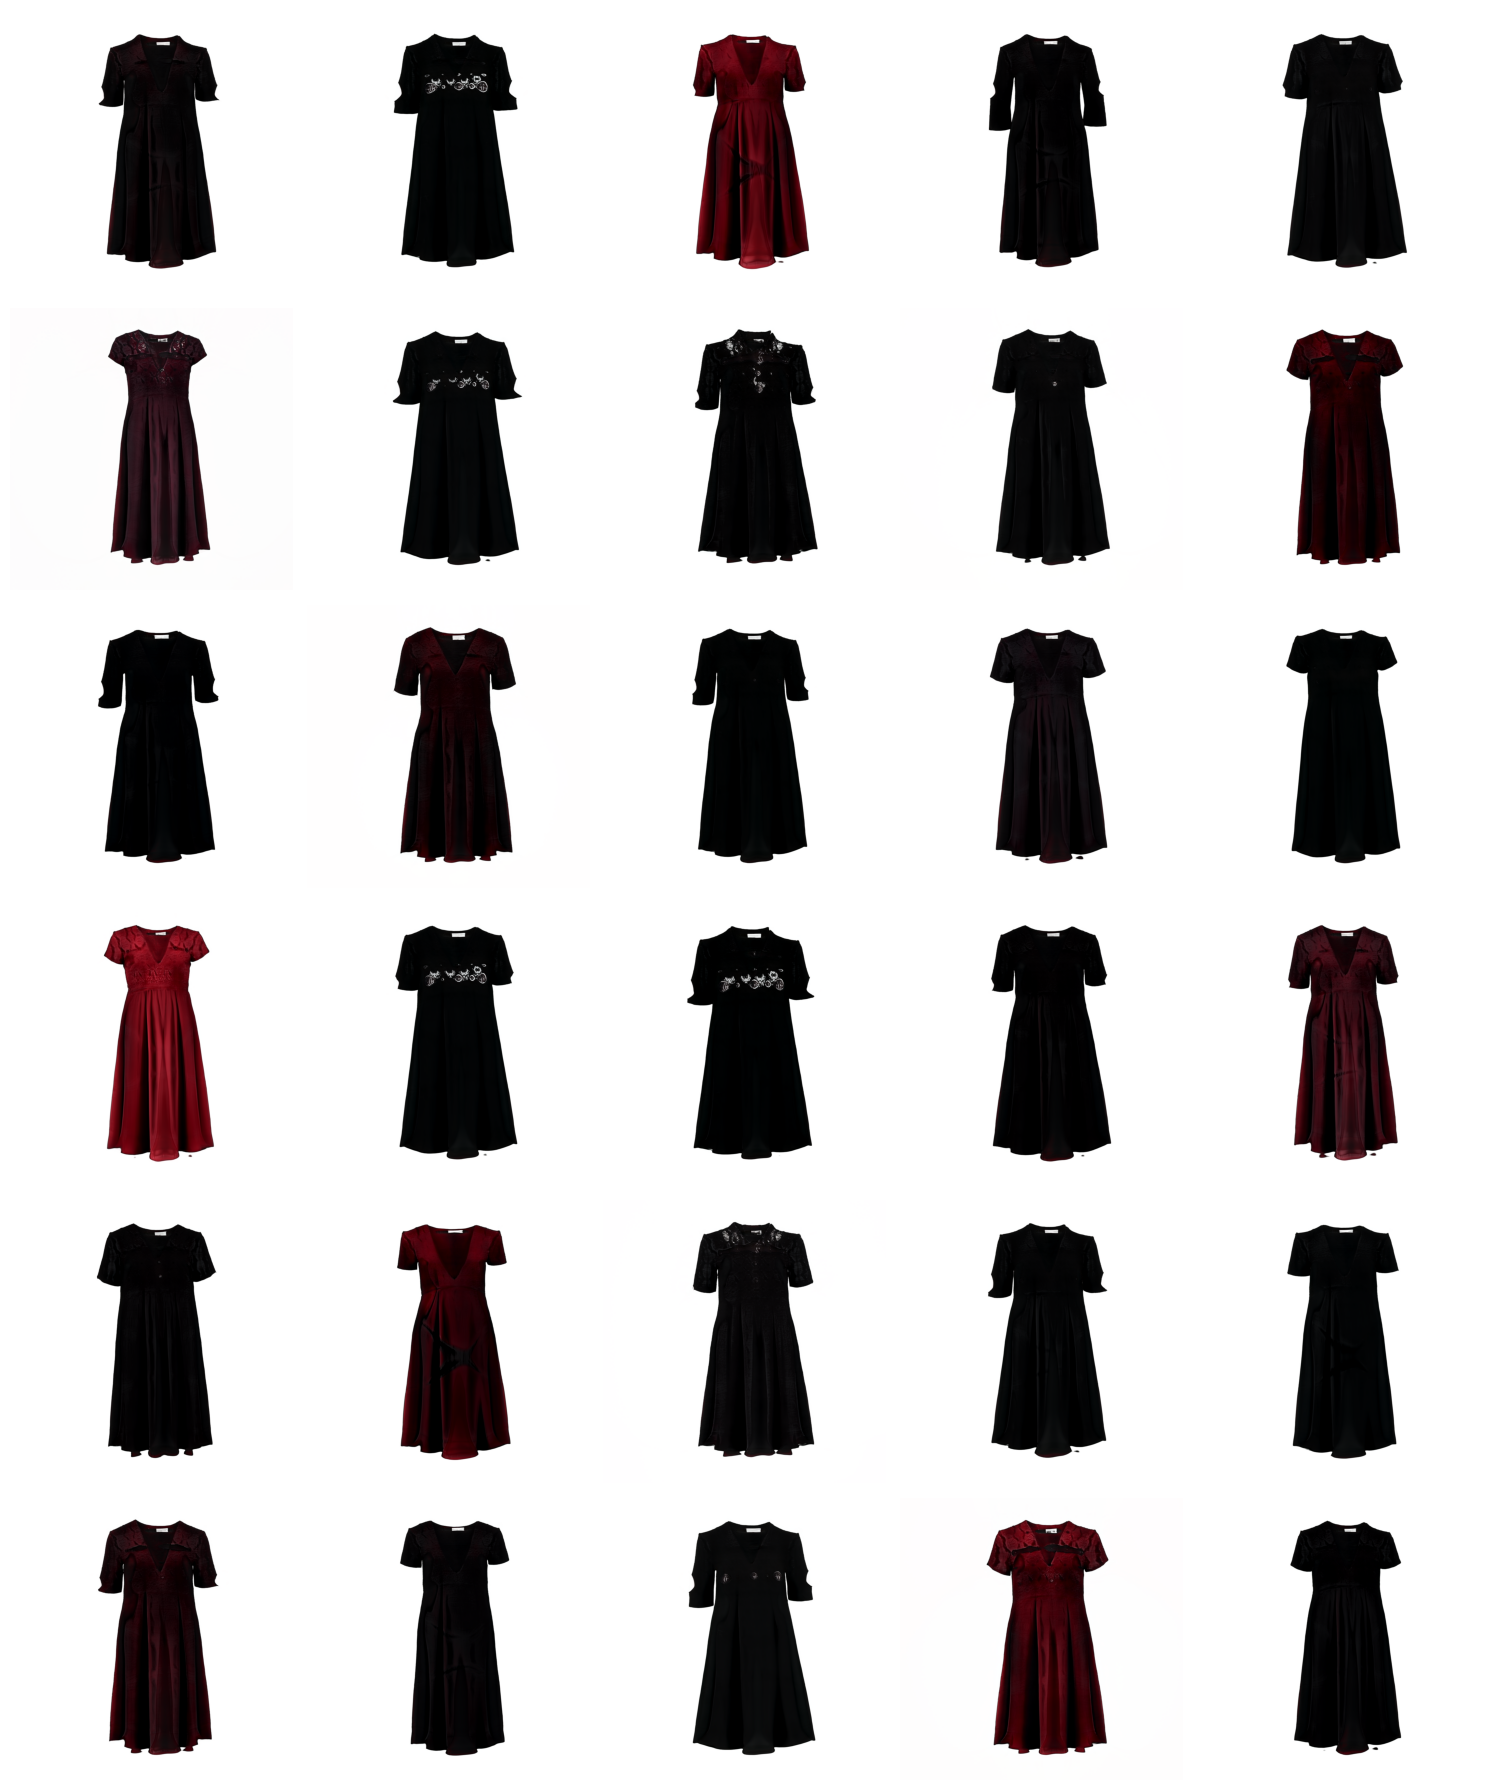

In [ ]:

MOVE_DIRECTION = -1
SCALE = 0.5

if MOVE_DIRECTION >= 0:
  current = current + explore_random[MOVE_DIRECTION]

num_images=30

cols = 5
rows = (num_images + cols - 1) // cols

#figure and axes for the grid
fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))  # adjust fig size

# timestamp folder name
timestamp = time.strftime("%Y%m%d_%H%M%S")
output_folder = f"/content/drive/My Drive/MA/output_images/{timestamp}"

# Create the folder if non there
os.makedirs(output_folder, exist_ok=True)
current = seed2vec(G, START_SEED_RANDOM)
initial_z = current.copy()
original_current = current.copy()
initial_img = generate_image(device, G, initial_z)
distance_initial = np.linalg.norm(initial_z - original_current)
initial_img.save(f"{output_folder}/img_distance_{distance_initial:.4f}.png")

#track the distances
distances_seen = set()
offset=0.2
all_distances=[]

# display images in the grid
for i, mv in enumerate(explore_random):
  z = current + mv
  offset+=0.2
  img = generate_image(device, G, z)
  distance = np.linalg.norm(z - original_current)
  all_distances.append(distance)

  # Make sure to not save distance twice
  if distance.round(2) not in distances_seen:
    distances_seen.add(distance.round(2))

    # Save + distance in name
    img.save(f"{output_folder}/img_distance_{distance:.4f}.png")
  else:
    print(f"Img with distance {distance:.4f} already seen.")

    # a little off
    z+offset
    img = generate_image(device, G, z)
    distance = np.linalg.norm(z - original_current)
    all_distances.append(distance)
    img.save(f"{output_folder}/img_distance_{distance:.4f}.png")

  # Calculate row and column index
  row_idx = i // cols
  col_idx = i % cols

  # Display the image
  ax = axes[row_idx, col_idx] if rows > 1 else axes[col_idx]  # Handle single row case
  ax.imshow(np.array(img))  # Convert PIL Image to NumPy array for imshow
  ax.axis('off')

# Adjust spacing
plt.tight_layout()
plt.show()

In [ ]:
!pip install flask-ngrok

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import random

# Simulation params
n_channels = 8
sampling_rate = 250
duration = 1.0
n_timepoints = int(duration * sampling_rate)
time = np.linspace(0, duration, n_timepoints)

# ERP peak, amplitude, scalp_distribution (before width)
def generate_erp_component(time, peak_time=0.3, amplitude=5.0, scalp_distribution=0.05):
    return amplitude * np.exp(-0.5 * ((time - peak_time) / scalp_distribution) ** 2)

# Dummy-data simulation
def create_fake_dataset(n_trials=30):
    data = []
    labels = []
    for _ in range(n_trials):
        label = random.choice(["wow", "ok", "not interesting"])
        trial = []
        for _ in range(n_channels):
            noise = np.random.normal(0, 1, n_timepoints)
            erp = generate_erp_component(time) if random.random() > 0.5 else 0
            signal = noise + erp
            trial.append(signal)
        data.append(np.array(trial))
        labels.append(label)
    return data, labels

# Daten laden
erp_data, labels = create_fake_dataset()
#print(erp_data)

# Define a function to extract the amplitude
def get_amplitude(arr):
    # Assuming amplitude is the maximum value in the array
    return np.max(arr)

# Create a list of amplitude values
amplitudes = [get_amplitude(trial) for trial in erp_data]

# Sort erp_data based on amplitudes using argsort
sorted_indices = np.argsort(amplitudes)
erp_data_sorted = [erp_data[i] for i in sorted_indices]
print(f'{sorted_indices}"sorted amplitudes')

[11  4 25 14  2 27  0  1  5 13 10 15  6 26 24 21  9 16 22 28 17 19 29 18
 12  8 23 20  7  3]"sorted amplitudes


In [ ]:
all_distances.sort()
amplitudes.sort()

erp_dist_map={}
for i in range(len(amplitudes)):
  erp_dist_map[all_distances[i]]=erp_data[i]

print(erp_dist_map)

{np.float64(6.242154720106085): array([[ 0.75167886,  1.16214485,  0.63196585, ..., -0.98161128,
        -1.09668386, -0.08145656],
       [-0.4391782 , -0.7960544 ,  0.30451257, ..., -2.39433436,
         1.284635  ,  0.57281585],
       [ 1.25036361, -1.42087399, -0.70310749, ..., -0.16746329,
         0.52337209,  0.39967328],
       ...,
       [-1.00003329,  0.72364227,  0.27793809, ...,  0.05623636,
        -0.23946145, -2.07363934],
       [ 0.19875147, -1.07307844,  0.59303064, ...,  2.06664092,
        -0.00870752, -1.06158344],
       [-0.26875629, -0.25510131,  0.25068585, ..., -0.29411815,
        -2.0441808 ,  0.36351539]]), np.float64(6.300558457300489): array([[ 0.52438936, -0.06239768, -0.50375384, ...,  0.50883071,
        -1.27880269,  2.06161916],
       [ 0.95288092, -0.14219502, -1.69179541, ..., -1.40223242,
         1.4088752 ,  2.53752275],
       [ 0.37074455, -0.92789066,  0.06376185, ...,  0.67762358,
         0.68583316, -1.22365482],
       ...,
       [ 2.

In [ ]:
num_samples = len(all_distances) # Number of latent vectors to generate
latent_vectors = []

# neue vorhersage
#latent space und dann mal gucken
# lies nochmal das paper
for _ in range(num_samples):
    z = erp_dist_map[all_distances[_]]
    latent_vectors.append(z.cpu().numpy().flatten())  # Store as flattened NumPy array

latent_vectors = np.array(latent_vectors)  # Convert to NumPy array

NameError: name 'all_distances' is not defined

In [ ]:
cd /content/drive/My Drive/MA

[Errno 2] No such file or directory: '/content/drive/MyDrive/MA'
/content


In [ ]:
!git add .

fatal: not a git repository (or any of the parent directories): .git


In [ ]:
!git config --global user.email "fionamariele@gmail.com"
!git config --global user.name "blackSwan566"

In [ ]:
! git commit -m "add random_seed, random explore, gantraining and new images"

fatal: not a git repository (or any of the parent directories): .git
